### The IMDB Implementation

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model

### Validating your approach

**Setting aside a validation set**

In [ ]:
import random
random.seed(10)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 63ms/step - loss: 0.5131 - accuracy: 0.7745 - val_loss: 0.3918 - val_accuracy: 0.8542
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3150 - accuracy: 0.8963 - val_loss: 0.3269 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2360 - accuracy: 0.9213 - val_loss: 0.2824 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1871 - accuracy: 0.9389 - val_loss: 0.2743 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1580 - accuracy: 0.9475 - val_loss: 0.3411 - val_accuracy: 0.8676
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1354 - accuracy: 0.9556 - val_loss: 0.3288 - val_accuracy: 0.8712
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1157 - accuracy: 0.9633 - val_loss: 0.2969 - val_accuracy: 0.8863
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

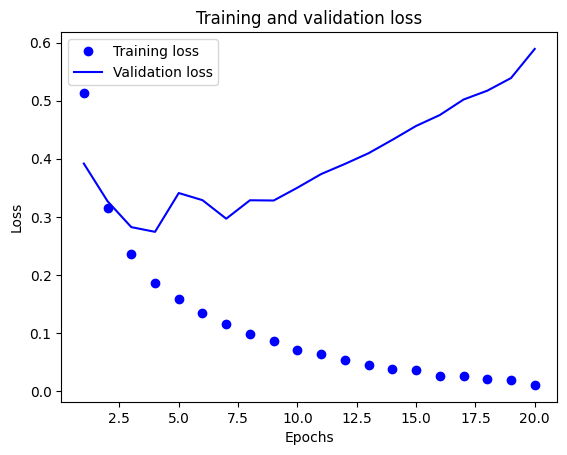

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

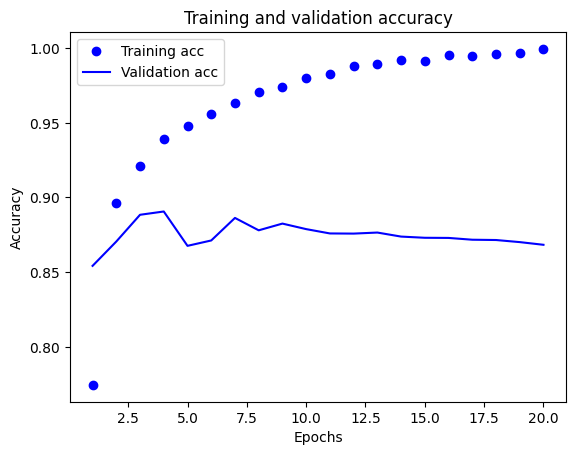

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4699 - accuracy: 0.8105
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2772 - accuracy: 0.9012
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2190 - accuracy: 0.9214
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2816 - accuracy: 0.8870


In [ ]:
results

[0.28161880373954773, 0.8869600296020508]

The model yeilds 88% accuracy with loss of 28.1%

In [ ]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.23986444],
       [0.9989255 ],
       [0.91693425],
       ...,
       [0.09661709],
       [0.07553425],
       [0.6417989 ]], dtype=float32)

Building model with 1 Layer

In [ ]:

model_1_layer = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model_1_layer.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
x_val1 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val1 = y_train[:10000]
partial_y_train = y_train[10000:]
history1_layer = model_1_layer.fit(partial_x_train,
 partial_y_train,
 epochs=20,
batch_size=512,
validation_data=(x_val1, y_val1))

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5044 - accuracy: 0.7829 - val_loss: 0.4020 - val_accuracy: 0.8498
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3232 - accuracy: 0.8985 - val_loss: 0.3312 - val_accuracy: 0.8734
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2567 - accuracy: 0.9172 - val_loss: 0.2941 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2171 - accuracy: 0.9312 - val_loss: 0.2820 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1879 - accuracy: 0.9409 - val_loss: 0.2771 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1668 - accuracy: 0.9482 - val_loss: 0.2803 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1496 - accuracy: 0.9557 - val_loss: 0.2878 - val_accuracy: 0.8819
Epoch 8/20
30

In [ ]:
history_dict1 = history1_layer.history
history_dict1.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

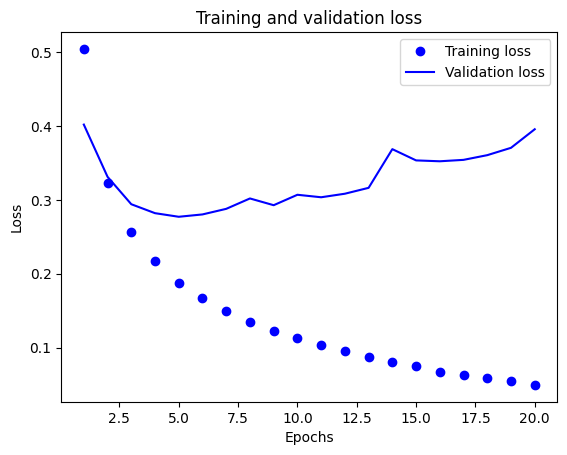

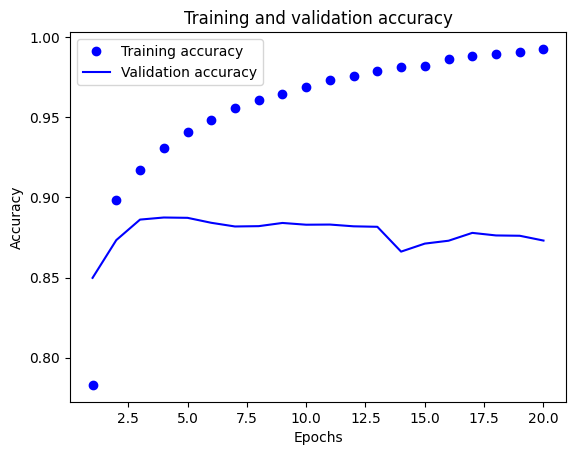

In [ ]:
import matplotlib.pyplot as plt
history_dict1 = history1_layer.history
loss_value1 = history_dict1["loss"]
val_loss_value1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_value1) + 1)
#Plotting graph of Training and Validation loss
plt.plot(epochs1, loss_value1, "bo", label="Training loss")
plt.plot(epochs1, val_loss_value1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Plotting graph of Training and Validation Accuracy
plt.clf()
accuracy1 = history_dict1["accuracy"]
val_accuracy1 = history_dict1["val_accuracy"]
plt.plot(epochs1, accuracy1, "bo", label="Training accuracy")
plt.plot(epochs1, val_accuracy1, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#Creating the model
model_1_layer = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model_1_layer.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model_1_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_1_layer = model_1_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 2s 9ms/step - loss: 0.4541 - accuracy: 0.8205
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2906 - accuracy: 0.9000
Epoch 3/5
49/49 [==============================] - 0s 9ms/step - loss: 0.2352 - accuracy: 0.9186
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.2043 - accuracy: 0.9282
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2859 - accuracy: 0.8840


In [ ]:
print(result_1_layer)

[0.28585559129714966, 0.8840399980545044]


Building Model with 3 layers

In [ ]:
model_1_layer.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.19017002],
       [0.99967957],
       [0.7475893 ],
       ...,
       [0.08527051],
       [0.06520567],
       [0.4953189 ]], dtype=float32)

In [ ]:

model_3_layers = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
x_val3 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val3 = y_train[:10000]
partial_y_train = y_train[10000:]
history_3_layers = model_3_layers.fit(partial_x_train,
 partial_y_train,
epochs=20,
 batch_size=512,
validation_data=(x_val3, y_val3))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5707 - accuracy: 0.7555 - val_loss: 0.4506 - val_accuracy: 0.8510
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3611 - accuracy: 0.8849 - val_loss: 0.3267 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2499 - accuracy: 0.9157 - val_loss: 0.2950 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1958 - accuracy: 0.9318 - val_loss: 0.2888 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1591 - accuracy: 0.9465 - val_loss: 0.2845 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1330 - accuracy: 0.9560 - val_loss: 0.3244 - val_accuracy: 0.8768
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1151 - accuracy: 0.9633 - val_loss: 0.3359 - val_accuracy: 0.8766
Epoch 8/20
30

In [ ]:
history_dict_3 = history_3_layers.history
history_dict_3.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

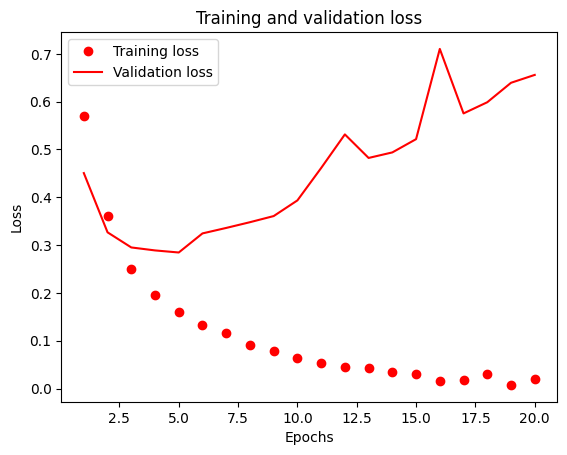

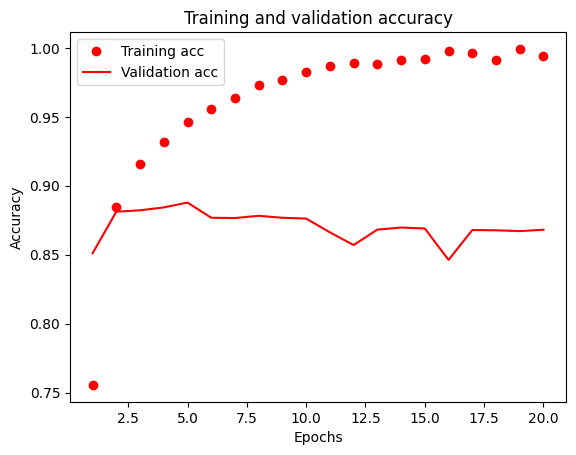

In [ ]:
loss_val3 = history_dict_3["loss"]
val_loss_val3 = history_dict_3["val_loss"]
epochs3 = range(1, len(loss_val3) + 1)
plt.plot(epochs3, loss_val3, "ro", label="Training loss")
plt.plot(epochs3, val_loss_val3, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf() #clear figure
accuracy3 = history_dict_3["accuracy"]
val_accuracy3 = history_dict_3["val_accuracy"]
plt.plot(epochs3, accuracy3, "ro", label="Training acc")
plt.plot(epochs3, val_accuracy3, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_3_layers = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model_3_layers.fit(x_train, y_train, epochs=5, batch_size=512)
results_3_layers = model_3_layers.evaluate(x_test, y_test)


Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.5414 - accuracy: 0.7844
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.3032 - accuracy: 0.8936
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2277 - accuracy: 0.9164
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.1914 - accuracy: 0.9299
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2993 - accuracy: 0.8831


In [ ]:
print(results_3_layers)
model_3_layers.predict(x_test)

[0.2993345558643341, 0.8831200003623962]
782/782 [==============================] - 1s 2ms/step


array([[0.19357751],
       [0.9995442 ],
       [0.8825634 ],
       ...,
       [0.09561777],
       [0.05881154],
       [0.69073546]], dtype=float32)

Building 32 Unit 3 layer Model

In [ ]:
model_32_units = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
#model validation
x_val_32 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_32 = y_train[:10000]
partial_y_train = y_train[10000:]
history_32_units = model_32_units.fit(partial_x_train,
 partial_y_train,
epochs=20,
 batch_size=512,
validation_data=(x_val_32, y_val_32))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5280 - accuracy: 0.7408 - val_loss: 0.3677 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2995 - accuracy: 0.8889 - val_loss: 0.2897 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2129 - accuracy: 0.9248 - val_loss: 0.2867 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1845 - accuracy: 0.9308 - val_loss: 0.3156 - val_accuracy: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1311 - accuracy: 0.9545 - val_loss: 0.3508 - val_accuracy: 0.8671
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1164 - accuracy: 0.9578 - val_loss: 0.3252 - val_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0858 - accuracy: 0.9708 - val_loss: 0.4400 - val_accuracy: 0.8541
Epoch 8/20
30

In [ ]:
history_dict_32 = history_32_units.history
history_dict_32.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

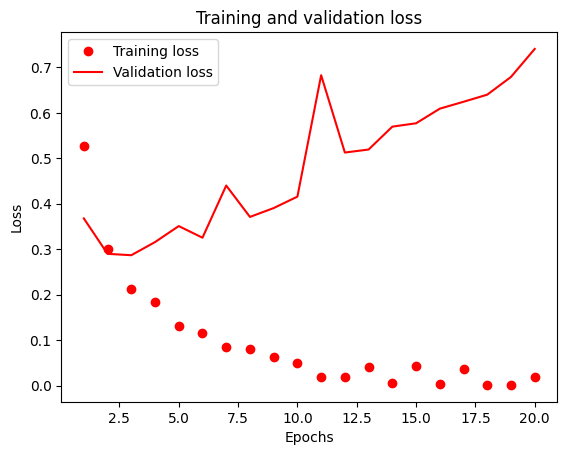

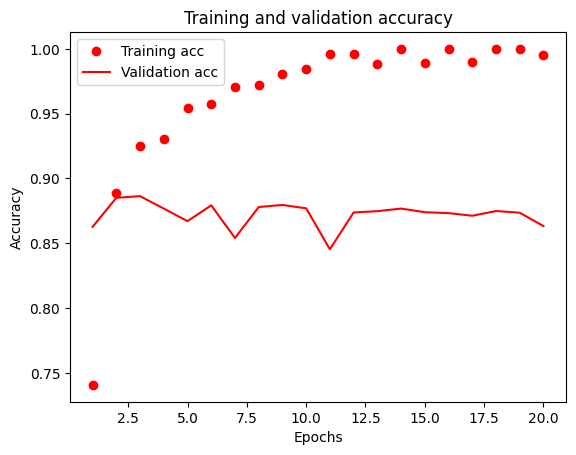

In [ ]:
loss_value_32 = history_dict_32["loss"]
val_loss_value_32 = history_dict_32["val_loss"]
epochs_32 = range(1, len(loss_value_32) + 1)
plt.plot(epochs_32, loss_value_32, "ro", label="Training loss")
plt.plot(epochs_32, val_loss_value_32, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf() #clear figure
accuracy_32 = history_dict_32["accuracy"]
val_accuracy_32 = history_dict_32["val_accuracy"]
plt.plot(epochs_32, accuracy_32, "ro", label="Training acc")
plt.plot(epochs_32, val_accuracy_32, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_32_units = model_32_units.fit(x_train, y_train, epochs=5, batch_size=512)
results_32_units = model_32_units.evaluate(x_test, y_test)
results_32_units

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1977 - accuracy: 0.9483
Epoch 2/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1068 - accuracy: 0.9674
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0683 - accuracy: 0.9794
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0445 - accuracy: 0.9874
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.5277 - accuracy: 0.8653


[0.5276642441749573, 0.8652799725532532]

In [ ]:
print(results_32_units)

[0.5276642441749573, 0.8652799725532532]


Building 64 Unit 3 Layer model

In [ ]:
model_64_units = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model_64_units.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])
# validation
x_val_64 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_64 = y_train[:10000]
partial_y_train = y_train[10000:]
history_64 = model_64_units.fit(partial_x_train,
 partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val_64, y_val_64))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5300 - accuracy: 0.7269 - val_loss: 0.3638 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3000 - accuracy: 0.8831 - val_loss: 0.3355 - val_accuracy: 0.8632
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2350 - accuracy: 0.9087 - val_loss: 0.3267 - val_accuracy: 0.8694
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1722 - accuracy: 0.9351 - val_loss: 0.2931 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1534 - accuracy: 0.9425 - val_loss: 0.2999 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1115 - accuracy: 0.9606 - val_loss: 0.5105 - val_accuracy: 0.8246
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0870 - accuracy: 0.9699 - val_loss: 0.3521 - val_accuracy: 0.8829
Epoch 8/20
30

In [ ]:
history_dict_64 = history_64.history
history_dict_64.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

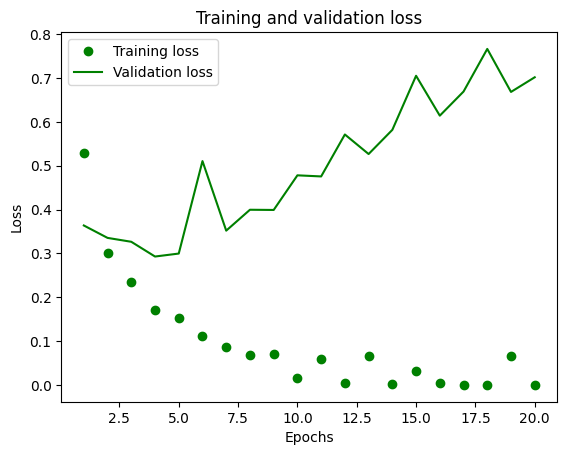

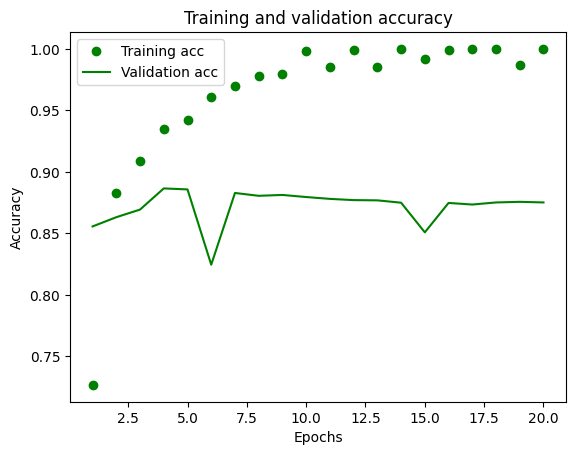

In [ ]:
loss_value64 = history_dict_64["loss"]
val_loss_value64 = history_dict_64["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plt.plot(epochs_64, loss_value64, "go", label="Training loss")
plt.plot(epochs_64, val_loss_value64, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
accuracy_64 = history_dict_64["accuracy"]
val_accuracy_64 = history_dict_64["val_accuracy"]
plt.plot(epochs_64, accuracy_64, "go", label="Training acc")
plt.plot(epochs_64, val_accuracy_64, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history_64 = model_64_units.fit(x_train, y_train, epochs=5, batch_size=512)
results_64_units = model_64_units.evaluate(x_test, y_test)
results_64_units

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1845 - accuracy: 0.9441
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0937 - accuracy: 0.9698
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0508 - accuracy: 0.9845
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.5333 - accuracy: 0.8694


[0.533331036567688, 0.8693600296974182]

Building 128 unit 3 Layer model

In [ ]:
model_128units = keras.Sequential([
 layers.Dense(128, activation="relu"),
 layers.Dense(128, activation="relu"),
 layers.Dense(128, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model_128units.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
# validation
x_val_128 = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_128 = y_train[:10000]
partial_y_train = y_train[10000:]
history_128 = model_128units.fit(partial_x_train,
 partial_y_train,
 epochs=20,
batch_size=512,
validation_data=(x_val_128, y_val_128))


Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5476 - accuracy: 0.7191 - val_loss: 0.3728 - val_accuracy: 0.8447
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3168 - accuracy: 0.8705 - val_loss: 0.2879 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2221 - accuracy: 0.9113 - val_loss: 0.2756 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1713 - accuracy: 0.9349 - val_loss: 0.2999 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1323 - accuracy: 0.9503 - val_loss: 0.3115 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0994 - accuracy: 0.9679 - val_loss: 0.5022 - val_accuracy: 0.8388
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0817 - accuracy: 0.9732 - val_loss: 0.3804 - val_accuracy: 0.8778
Epoch 8/20
30

In [ ]:
history_dict_128 = history_128.history
history_dict_128.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

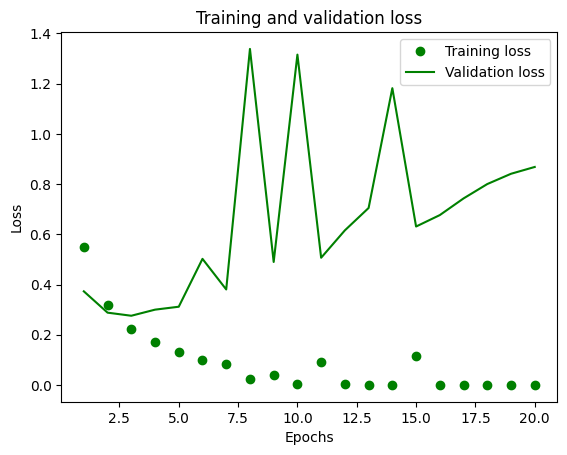

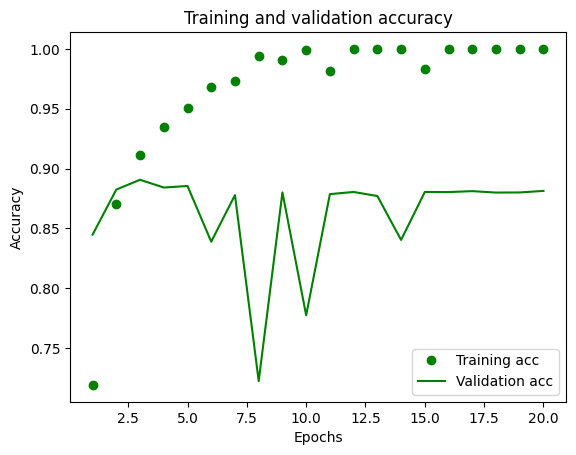

In [ ]:

loss_value128 = history_dict_128["loss"]
val_loss_value128 = history_dict_128["val_loss"]
epochs_128 = range(1, len(loss_value128) + 1)
plt.plot(epochs_128, loss_value128, "go", label="Training loss")
plt.plot(epochs_128, val_loss_value128, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
accuracy_128 = history_dict_128["accuracy"]
val_accuracy_128 = history_dict_128["val_accuracy"]
plt.plot(epochs_128, accuracy_128, "go", label="Training acc")
plt.plot(epochs_128, val_accuracy_128, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history_128 = model_128units.fit(x_train, y_train, epochs=4, batch_size=512)
results_128_units = model_128units.evaluate(x_test, y_test)
results_128_units


Epoch 1/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1827 - accuracy: 0.9423
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.0817 - accuracy: 0.9733
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.9881
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.4531 - accuracy: 0.8765


[0.4530925452709198, 0.8765199780464172]

MSE Loss Function

In [ ]:
MSE_model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model.compile(optimizer="rmsprop",
 loss="mse",
 metrics=["accuracy"])
# validation of model
x_val_MSE = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_MSE = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
history_MSE = MSE_model.fit(partial_x_train,
 partial_y_train,
epochs=20,
 batch_size=512,
validation_data=(x_val_MSE, y_val_MSE))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.1791 - accuracy: 0.7647 - val_loss: 0.1271 - val_accuracy: 0.8506
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0993 - accuracy: 0.8892 - val_loss: 0.0951 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0722 - accuracy: 0.9161 - val_loss: 0.0955 - val_accuracy: 0.8704
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0585 - accuracy: 0.9330 - val_loss: 0.0856 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0471 - accuracy: 0.9465 - val_loss: 0.0888 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0418 - accuracy: 0.9533 - val_loss: 0.0862 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0327 - accuracy: 0.9669 - val_loss: 0.0988 - val_accuracy: 0.8659
Epoch 8/20
30

In [ ]:
historydict_MSE = history_MSE.history
historydict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

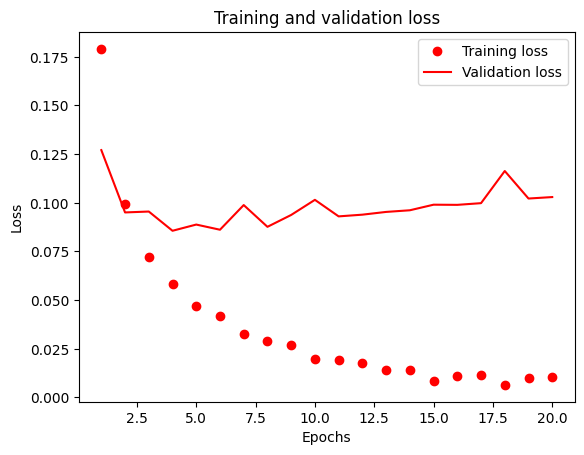

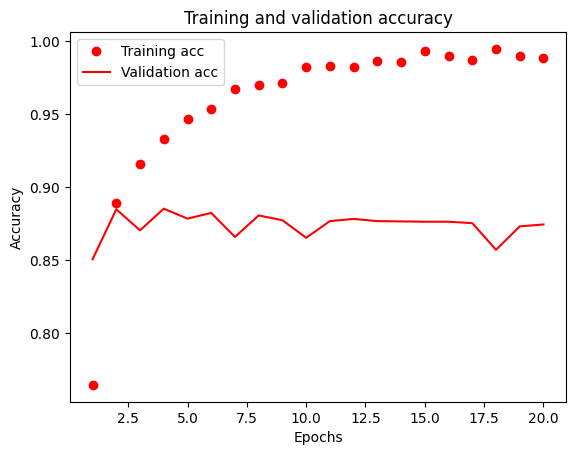

In [ ]:
import matplotlib.pyplot as plt
loss_value_MSE = historydict_MSE["loss"]
val_loss_value_MSE = historydict_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)
plt.plot(epochs_MSE, loss_value_MSE, "ro", label="Training loss")
plt.plot(epochs_MSE, val_loss_value_MSE, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_MSE = historydict_MSE["accuracy"]
val_acc_MSE = historydict_MSE["val_accuracy"]
plt.plot(epochs_MSE, acc_MSE, "ro", label="Training acc")
plt.plot(epochs_MSE, val_acc_MSE, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
MSE_model.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = MSE_model.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0457 - accuracy: 0.9457
Epoch 2/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0359 - accuracy: 0.9592
Epoch 3/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0293 - accuracy: 0.9668
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0259 - accuracy: 0.9719
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0225 - accuracy: 0.9763
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0196 - accuracy: 0.9803
Epoch 7/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0194 - accuracy: 0.9798
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1124 - accuracy: 0.8667


[0.11238150298595428, 0.8666800260543823]

TANH Activation

In [ ]:
tanh = keras.Sequential([
 layers.Dense(16, activation="tanh"),
 layers.Dense(1, activation="sigmoid")
])
tanh.compile(optimizer='rmsprop',
 loss='mse',
 metrics=['accuracy'])
x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]
y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]
historytanh_model = tanh.fit(partial_x_train,
 partial_y_train,
 epochs=20,
batch_size=512,
validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1730 - accuracy: 0.7841 - val_loss: 0.1306 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1083 - accuracy: 0.8895 - val_loss: 0.1050 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0847 - accuracy: 0.9121 - val_loss: 0.1039 - val_accuracy: 0.8632
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0720 - accuracy: 0.9238 - val_loss: 0.0885 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0630 - accuracy: 0.9322 - val_loss: 0.0905 - val_accuracy: 0.8784
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0561 - accuracy: 0.9417 - val_loss: 0.0839 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0506 - accuracy: 0.9471 - val_loss: 0.0863 - val_accuracy: 0.8823
Epoch 8/20
30

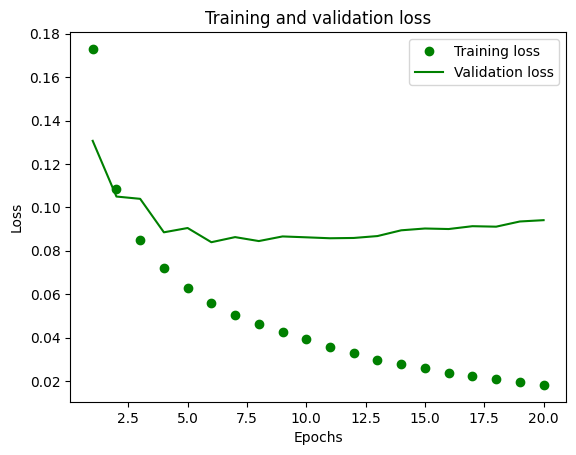

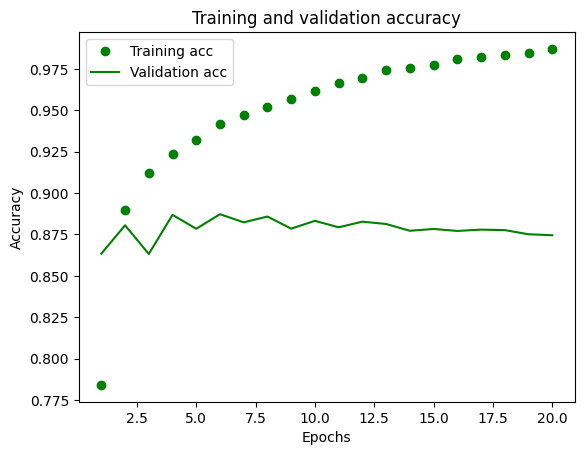

In [ ]:
historydict_tanh = historytanh_model.history
historydict_tanh.keys()
loss_value_tanh= historydict_tanh["loss"]
val_loss_value_tanh = historydict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)
plt.plot(epochs_tanh, loss_value_tanh, "go", label="Training loss")
plt.plot(epochs_tanh, val_loss_value_tanh, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_tanh = historydict_tanh["accuracy"]
val_acc_tanh = historydict_tanh["val_accuracy"]
plt.plot(epochs_tanh, acc_tanh, "go", label="Training acc")
plt.plot(epochs_tanh, val_acc_tanh, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.9434
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0411 - accuracy: 0.9532
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0361 - accuracy: 0.9596
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0340 - accuracy: 0.9630
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0313 - accuracy: 0.9670
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0293 - accuracy: 0.9699
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.9723
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.8680


[0.10449386388063431, 0.8679599761962891]

Adam Operator

In [ ]:
adam = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
adam.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy'])
x_adam = x_train[:10000]
partial_x_train = x_train[10000:]
y_adam = y_train[:10000]
partial_y_train = y_train[10000:]
historyadam = adam.fit(partial_x_train,
 partial_y_train,
epochs=20,
 batch_size=512,
validation_data=(x_adam, y_adam))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5778 - accuracy: 0.7550 - val_loss: 0.4218 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3146 - accuracy: 0.9003 - val_loss: 0.2953 - val_accuracy: 0.8857
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2020 - accuracy: 0.9311 - val_loss: 0.2914 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1478 - accuracy: 0.9502 - val_loss: 0.2873 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1076 - accuracy: 0.9681 - val_loss: 0.3119 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0782 - accuracy: 0.9799 - val_loss: 0.3389 - val_accuracy: 0.8800
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0565 - accuracy: 0.9880 - val_loss: 0.3754 - val_accuracy: 0.8771
Epoch 8/20
30

In [ ]:
historydict_adam = historyadam.history
historydict_adam.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

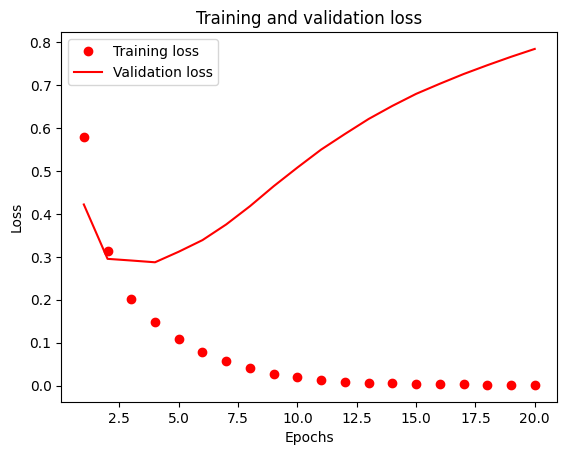

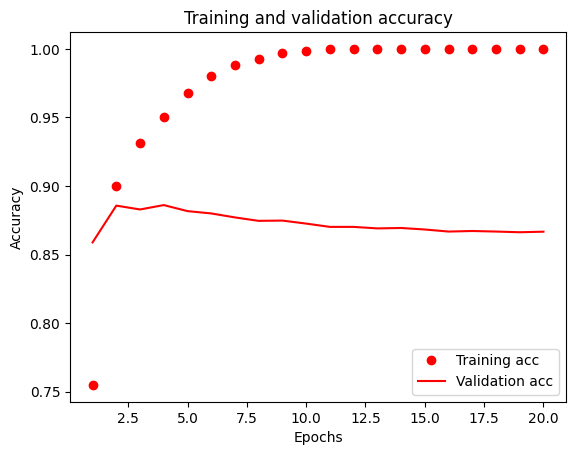

In [ ]:
loss_value_adam = historydict_adam["loss"]
val_loss_value_adam = historydict_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)
plt.plot(epochs_adam, loss_value_adam, "ro", label="Training loss")
plt.plot(epochs_adam, val_loss_value_adam, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_adam = historydict_adam["accuracy"]
val_acc_adam = historydict_adam["val_accuracy"]
plt.plot(epochs_adam, acc_adam, "ro", label="Training acc")
plt.plot(epochs_adam, val_acc_adam, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
adam.fit(x_train, y_train, epochs=8, batch_size=512)
results_adam = adam.evaluate(x_test, y_test)
results_adam

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2532 - accuracy: 0.9371
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1166 - accuracy: 0.9635
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0806 - accuracy: 0.9770
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0583 - accuracy: 0.9855
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0426 - accuracy: 0.9910
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0310 - accuracy: 0.9946
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0239 - accuracy: 0.9963
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.7540 - accuracy: 0.8501


[0.7539851069450378, 0.8500800132751465]

### Adding Dropout and Regularization techniques

Regularization with 16 units, 2 Layers

In [ ]:
from tensorflow.keras import regularizers
regularization = keras.Sequential([
 layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
 layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
 layers.Dense(1, activation="sigmoid")
])
regularization.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_regularization = regularization.fit(partial_x_train,
 partial_y_train,
epochs=20,
batch_size=512,
 validation_data=(x_val, y_val))
historydict_regularization = history_regularization.history
historydict_regularization.keys()

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5550 - accuracy: 0.7687 - val_loss: 0.4314 - val_accuracy: 0.8601
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3509 - accuracy: 0.9008 - val_loss: 0.3718 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2865 - accuracy: 0.9191 - val_loss: 0.3522 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2500 - accuracy: 0.9319 - val_loss: 0.3336 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2208 - accuracy: 0.9459 - val_loss: 0.3303 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2084 - accuracy: 0.9496 - val_loss: 0.3425 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1932 - accuracy: 0.9564 - val_loss: 0.3462 - val_accuracy: 0.8846
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

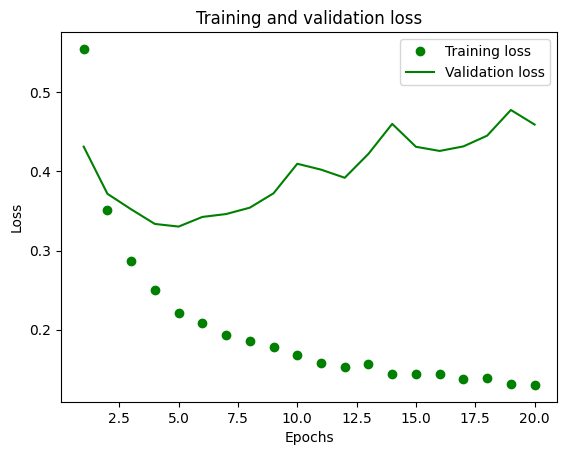

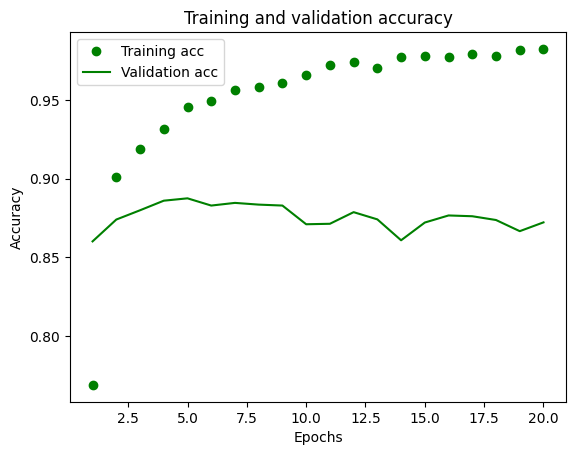

In [ ]:
loss_valu = historydict_regularization["loss"]
val_loss_value_r = historydict_regularization["val_loss"]
epochs_r = range(1, len(loss_valu) + 1)
plt.plot(epochs_r, loss_valu, "go", label="Training loss")
plt.plot(epochs_r, val_loss_value_r, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_r = historydict_regularization["accuracy"]
val_acc_r = historydict_regularization["val_accuracy"]
plt.plot(epochs_r, acc_r, "go", label="Training acc")
plt.plot(epochs_r, val_acc_r, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = regularization.evaluate(x_test, y_test)
results_regularization


Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.2544 - accuracy: 0.9366
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2127 - accuracy: 0.9470
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1941 - accuracy: 0.9528
Epoch 4/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1840 - accuracy: 0.9567
Epoch 5/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1797 - accuracy: 0.9569
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.1708 - accuracy: 0.9614
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.1694 - accuracy: 0.9624
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4396 - accuracy: 0.8665


[0.4396273195743561, 0.8664799928665161]

Dropout with 16 units, 2 layers

In [ ]:
from tensorflow.keras import regularizers
Dropout = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dropout(0.5),
 layers.Dense(16, activation="relu"),
 layers.Dropout(0.5),
 layers.Dense(1, activation="sigmoid")
])
Dropout.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
history_Dropout = Dropout.fit(partial_x_train,
 partial_y_train,
epochs=20,
batch_size=512,
 validation_data=(x_val, y_val))
historydict_Dropout = history_Dropout.history
historydict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.6418 - accuracy: 0.6301 - val_loss: 0.5457 - val_accuracy: 0.8214
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5347 - accuracy: 0.7467 - val_loss: 0.4294 - val_accuracy: 0.8623
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4520 - accuracy: 0.8019 - val_loss: 0.3508 - val_accuracy: 0.8763
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3913 - accuracy: 0.8377 - val_loss: 0.3114 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3479 - accuracy: 0.8657 - val_loss: 0.2924 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3017 - accuracy: 0.8867 - val_loss: 0.2775 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2660 - accuracy: 0.9025 - val_loss: 0.2751 - val_accuracy: 0.8867
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

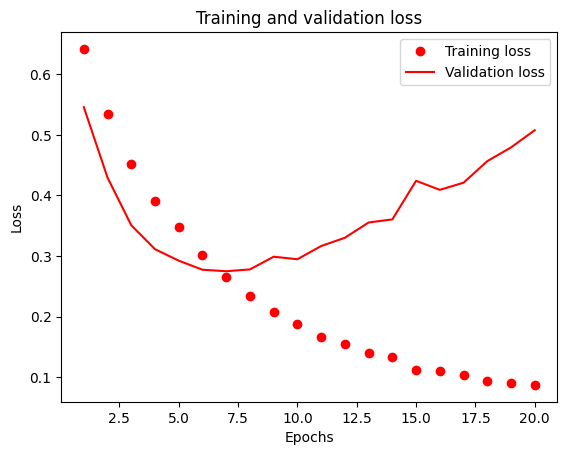

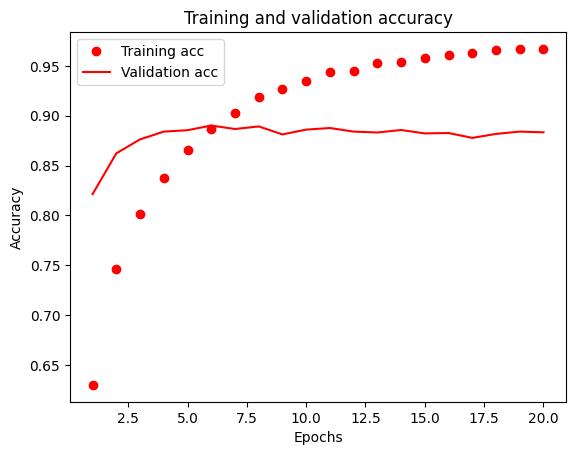

In [ ]:
loss_val = historydict_Dropout["loss"]
val_loss_val_d = historydict_Dropout["val_loss"]
epochs_d = range(1, len(loss_val) + 1)
plt.plot(epochs_d, loss_val, "ro", label="Training loss")
plt.plot(epochs_d, val_loss_val_d, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_d = historydict_Dropout["accuracy"]
val_acc_d = historydict_Dropout["val_accuracy"]
plt.plot(epochs_d, acc_d, "ro", label="Training acc")
plt.plot(epochs_d, val_acc_d, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
Dropout.fit(x_train, y_train, epochs=10, batch_size=512)
results_Dropout = Dropout.evaluate(x_test, y_test)
results_Dropout


Epoch 1/10
49/49 [==============================] - 1s 10ms/step - loss: 0.2527 - accuracy: 0.9195
Epoch 2/10
49/49 [==============================] - 1s 10ms/step - loss: 0.2099 - accuracy: 0.9294
Epoch 3/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1861 - accuracy: 0.9349
Epoch 4/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1687 - accuracy: 0.9407
Epoch 5/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1563 - accuracy: 0.9462
Epoch 6/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1456 - accuracy: 0.9498
Epoch 7/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1426 - accuracy: 0.9497
Epoch 8/10
49/49 [==============================] - 0s 10ms/step - loss: 0.1345 - accuracy: 0.9514
Epoch 9/10
49/49 [==============================] - 1s 10ms/step - loss: 0.1293 - accuracy: 0.9538
Epoch 10/10
782/782 [==============================] - 2s 2ms/step - loss: 0.5223 - accuracy: 0.8763


[0.5222946405410767, 0.8762800097465515]

Hyper Tuned parameters

In [ ]:
from tensorflow.keras import regularizers
Hyper = keras.Sequential([
 layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
 layers.Dropout(0.5),
 layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
 layers.Dropout(0.5),
 layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
 layers.Dropout(0.5),
 layers.Dense(1, activation="sigmoid")
])
Hyper.compile(optimizer="rmsprop",
 loss="mse",
 metrics=["accuracy"])
history_Hyper = Hyper.fit(partial_x_train,
 partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))
history_dictHyper = history_Hyper.history
history_dictHyper.keys()


Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.2522 - accuracy: 0.5679 - val_loss: 0.2143 - val_accuracy: 0.8197
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2104 - accuracy: 0.7015 - val_loss: 0.1500 - val_accuracy: 0.8599
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1680 - accuracy: 0.7923 - val_loss: 0.1156 - val_accuracy: 0.8737
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1372 - accuracy: 0.8423 - val_loss: 0.1026 - val_accuracy: 0.8798
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1162 - accuracy: 0.8742 - val_loss: 0.0974 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0989 - accuracy: 0.8967 - val_loss: 0.0984 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0864 - accuracy: 0.9120 - val_loss: 0.0988 - val_accuracy: 0.8881
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

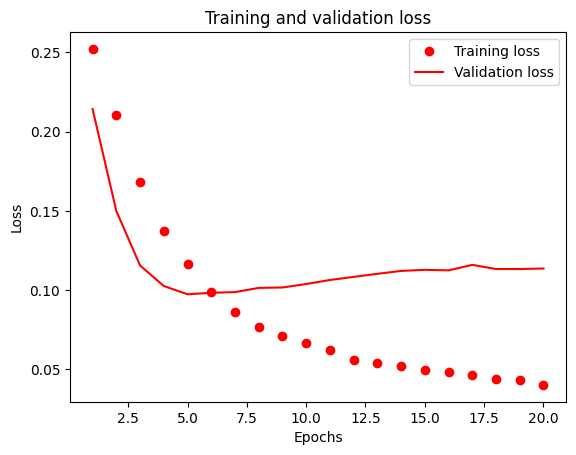

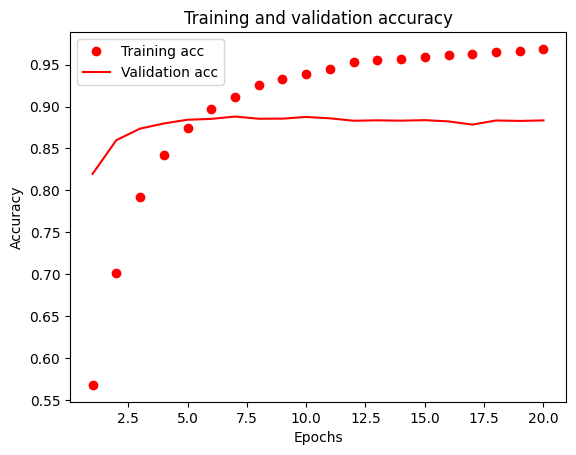

In [ ]:
loss_va_h = history_dictHyper["loss"]
val_loss_va_h = history_dictHyper["val_loss"]
epochs_h = range(1, len(loss_va_h) + 1)
plt.plot(epochs_h, loss_va_h, "ro", label="Training loss")
plt.plot(epochs_h, val_loss_va_h, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_h = history_dictHyper["accuracy"]
val_acc_h = history_dictHyper["val_accuracy"]
plt.plot(epochs_h, acc_h, "ro", label="Training acc")
plt.plot(epochs_h, val_acc_h, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:

Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0738 - accuracy: 0.9277
Epoch 2/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0668 - accuracy: 0.9355
Epoch 3/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0628 - accuracy: 0.9392
Epoch 4/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0605 - accuracy: 0.9434
Epoch 5/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0590 - accuracy: 0.9438
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.0546 - accuracy: 0.9498
Epoch 7/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0532 - accuracy: 0.9515
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1139 - accuracy: 0.8788


[0.1139034777879715, 0.8788400292396545]

<Figure size 640x480 with 0 Axes>

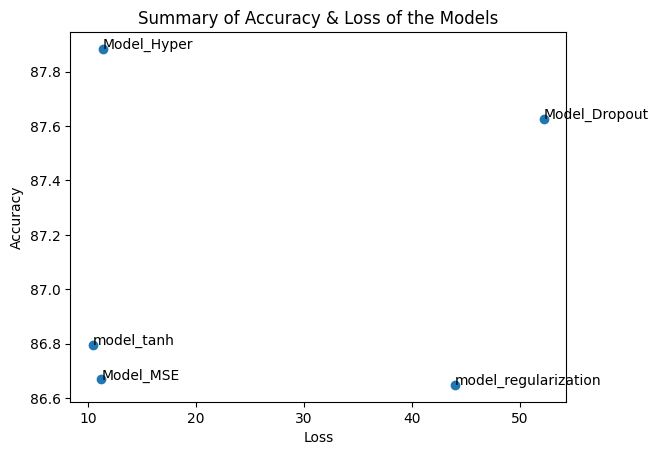

In [ ]:
Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
Models_Loss
Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()
fig, ax = plt.subplots()
ax.scatter(Models_Loss,Models_Accuracy)
for i, txt in enumerate(Labels):
 ax.annotate(txt, (Models_Loss[i],Models_Accuracy[i] ))
plt.title("Summary of Accuracy & Loss of the Models")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()


# Summary
From the results obtained it can be observed that a neural network model for IMDB dataset have,

Right number of hidden layers, if the layers are less the model capability will be reduced and if the layers are more even then the capability will be reduced. In this model 2 layers are considered.

Right unit size based on the dataset, If the dataset is not too complex or dataset is less the unit size should be less. Here in this model unit size of 16 is optimal.

Proper selection of loss function. It can be observed that loss function binary cross entropy has higher accuracy rate than mean square error loss function.

Relu activation function has high capability of finding the non-linear relationship between datapoints rather than tanh activation function

To improve the original, regularization and dropout techniques are used. With the technique used, validation loss has been decreased slightly and accuracy is increased. These additions have improved the model slightly by 2%.


# Conclusion

Neural network models with different configurations showed different patterns of sensitivity and loss. Among these, the Model_Hyper tuning.
Overall, the performance of the models was much enhanced by the addition of dropout regularization, with Model hyper being the most accurate